In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
/kaggle/input/spamsmsdetection/spam.csv


# Importing the libraries and models

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



# Dataset Loading

In [10]:
# Data Loading & Preprocessing [2][3]
df = pd.read_csv('/kaggle/input/spamsmsdetection/spam.csv', encoding='latin-1')
df_clean = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})
df_clean['label'] = df_clean['label'].map({'ham': 0, 'spam': 1})


# EDA Visualization

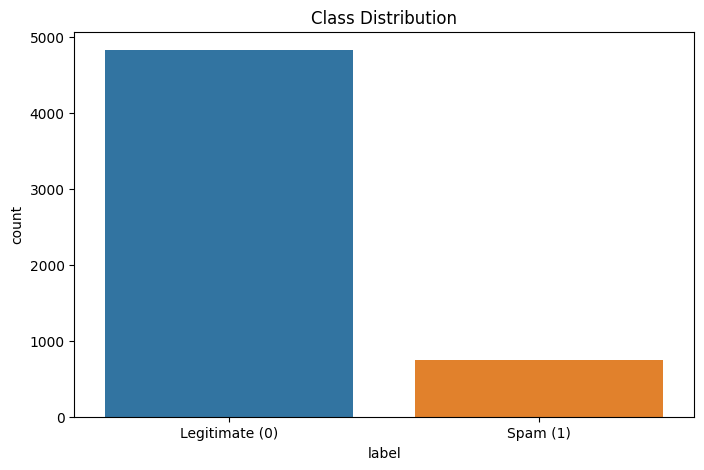

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=df_clean)
plt.title('Class Distribution')
plt.xticks([0,1], ['Legitimate (0)', 'Spam (1)'])
plt.show()

# Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df_clean['message'], 
    df_clean['label'],
    test_size=0.2,
    random_state=42,
    stratify=df_clean['label']
)

# TF-IDF Vectorization

In [13]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Model Training

In [14]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': LinearSVC()
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)

# Model Evaluation

In [15]:
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {
        'accuracy': acc,
        'report': classification_report(y_test, y_pred),
        'confusion_matrix': cm
    }

# Visualization of Results

# Accuracy

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


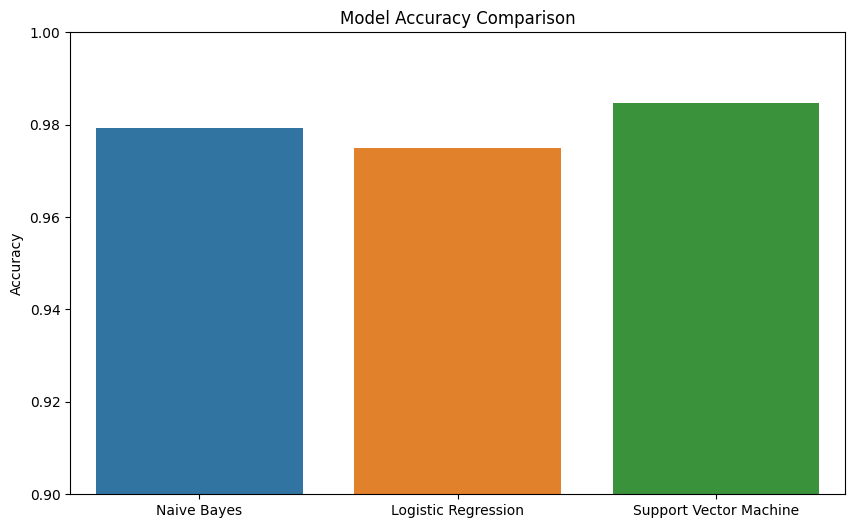

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(results.keys()), y=[v['accuracy'] for v in results.values()])
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1.0)
plt.ylabel('Accuracy')
plt.show()

# Confusion Matrix

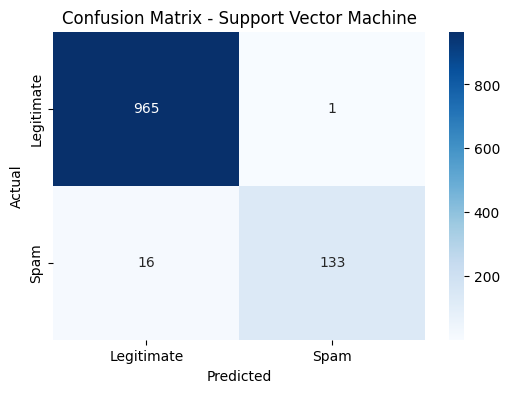

In [17]:
best_model = 'Support Vector Machine'
cm = results[best_model]['confusion_matrix']
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Legitimate', 'Spam'],
           yticklabels=['Legitimate', 'Spam'])
plt.title(f'Confusion Matrix - {best_model}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Print Classification Results

In [19]:
print("\n=== Classification Reports ===")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(metrics['report'])


=== Classification Reports ===

Naive Bayes:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115


Support Vector Machine:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.95  

# Example

In [20]:
sample_message = ["WINNER!! You've been selected for a free vacation. Text YES to claim!"]
sample_tfidf = vectorizer.transform(sample_message)
for name, model in models.items():
    print(f"\n{name} Prediction:", "SPAM" if model.predict(sample_tfidf)[0] else "NOT SPAM")


Naive Bayes Prediction: SPAM

Logistic Regression Prediction: SPAM

Support Vector Machine Prediction: SPAM
